<u><h1><center>**Conversion Rate Challenge**
-------------------------------


# <u> Part 1 : Import libraries and load the dataset

<u><h4>1.Import useful modules

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

<u><h4>2.Load the data

In [2]:
# Import dataset
print("loading dataset...")
df=pd.read_csv("conversion_data_train.csv")
print("...done")
print()

loading dataset...
...done



In [3]:
print('Set with labels (our train+test) :', df.shape)
print()

Set with labels (our train+test) : (284580, 6)



# <u> Part 2: EDA, Preprocessing, and Baseline Model

<u><h4>1.Understand the data

As the data is quite big, we will proceed with a sample of the dataset.

In [4]:
data_sample=df.sample(20000,random_state=0)

In [5]:
#Basics stats
print("Number of rows: {}".format(data_sample.shape[0]))
print("Number of columns: {}".format(data_sample.shape[1]))
print()

print ("Dsipaly of dataset: ")
display(data_sample.head())
print()
print()

print ("Basics statistics: ")
df_desc= data_sample.describe(include="all")
display(df_desc)
print()

print("Percentage of missing values: ")
display(100*data_sample.isnull().sum()/data_sample.shape[0])

Number of rows: 20000
Number of columns: 6

Dsipaly of dataset: 


,country,age,new_user,source,total_pages_visited,converted
149371,US,20,1,Ads,7,0
221325,US,31,1,Seo,5,0
14016,US,28,0,Seo,4,0
257982,Germany,25,1,Ads,4,0
59983,US,44,0,Ads,7,0




Basics statistics: 


,country,age,new_user,source,total_pages_visited,converted
count,20000,20000.000000,20000.000000,20000,20000.000000,20000.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,11234,NaN,NaN,9852,NaN,NaN
mean,NaN,30.538600,0.679100,NaN,4.889400,0.033900
std,NaN,8.273212,0.466834,NaN,3.384397,0.180976
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000



Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64


</u><ins><center> <font color="bleu"><ins>Basic statistics summary</font> </center>
 <li> The dataset has 20000 rows and 6 columns.
 <li> The majority of the users are from the United States
 <li> The average age of the users is 30.5 years, with an outlier of 123 years old, what is not probable.
 <li> Almost 68% of the users are new users.
 <li>The most common source of users is "Seo".
 <li>The total number of pages visited by the users is 4.89 pages. Some users have visited up to 28 pages.
 <li>Only 3,3% of the users have converted, what is a very low conversion rate. it can suggested that our data is unbalanced with a low rate of conversion.
 <li>We do not have any missing values

<u><h4> 2.Data visualisation

<u>2.1 Univariate analysis

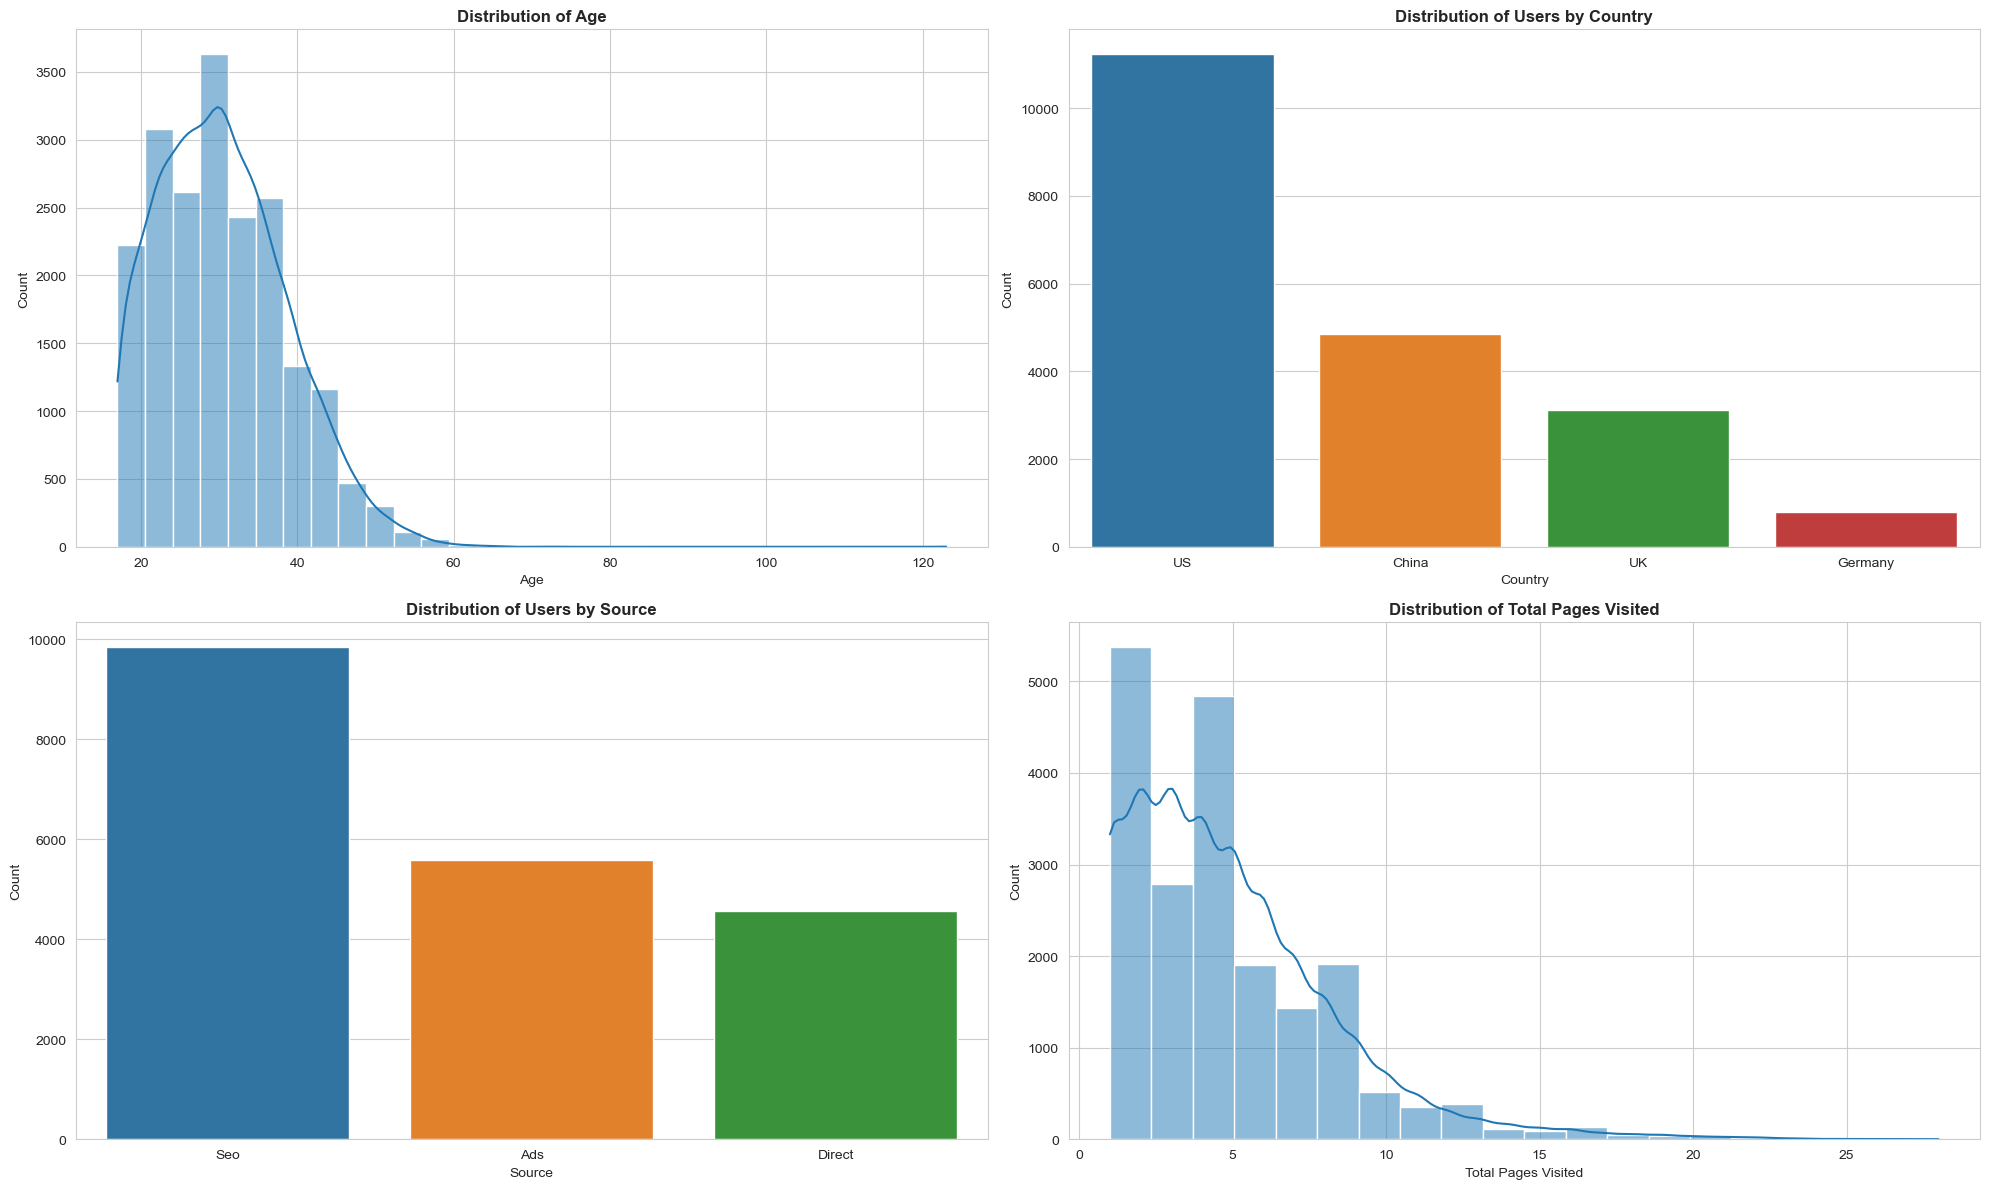

In [6]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure object
plt.figure(figsize=(20, 12))

# Distribution of age
plt.subplot(2, 2, 1)
sns.histplot(data_sample['age'], kde=True, bins=30)
plt.title('Distribution of Age', weight='bold')
plt.xlabel('Age')
plt.ylabel('Count')

# Distribution of users by country
plt.subplot(2, 2, 2)
sns.countplot(data=data_sample, x='country', order=data_sample['country'].value_counts().index)
plt.title('Distribution of Users by Country', weight='bold')
plt.xlabel('Country')
plt.ylabel('Count')

# Distribution of users by source
plt.subplot(2, 2, 3)
sns.countplot(data=data_sample, x='source', order=data_sample['source'].value_counts().index)
plt.title('Distribution of Users by Source', weight='bold')
plt.xlabel('Source')
plt.ylabel('Count')

# Distribution of total pages visited
plt.subplot(2, 2, 4)
sns.histplot(data_sample['total_pages_visited'], kde=True, bins=20)
plt.title('Distribution of Total Pages Visited',weight='bold')
plt.xlabel('Total Pages Visited')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
- 1. <ins> Distribution of age </ins> : Most users are between 20 and 40 years old, peaking around the late 20s. As mentionned before, there seem to be a few outliers with very high ages.
- 2. <ins>Distribution of users by country</ins> : The US has the largest numbers of users, followed by China, the UK and finally Germany.
- 3. <ins>Distribution of users by source</ins> : The majority of users come from the "Seo" source, followed by "Ads" and "Direct".
- 4. <ins>Distribution of total pages visited</ins> : Most users visit between 1 and 5 pages, with a gradual decrease in the number of users as the number of pages visited increases.



<u>2.2. Bivariate analysis

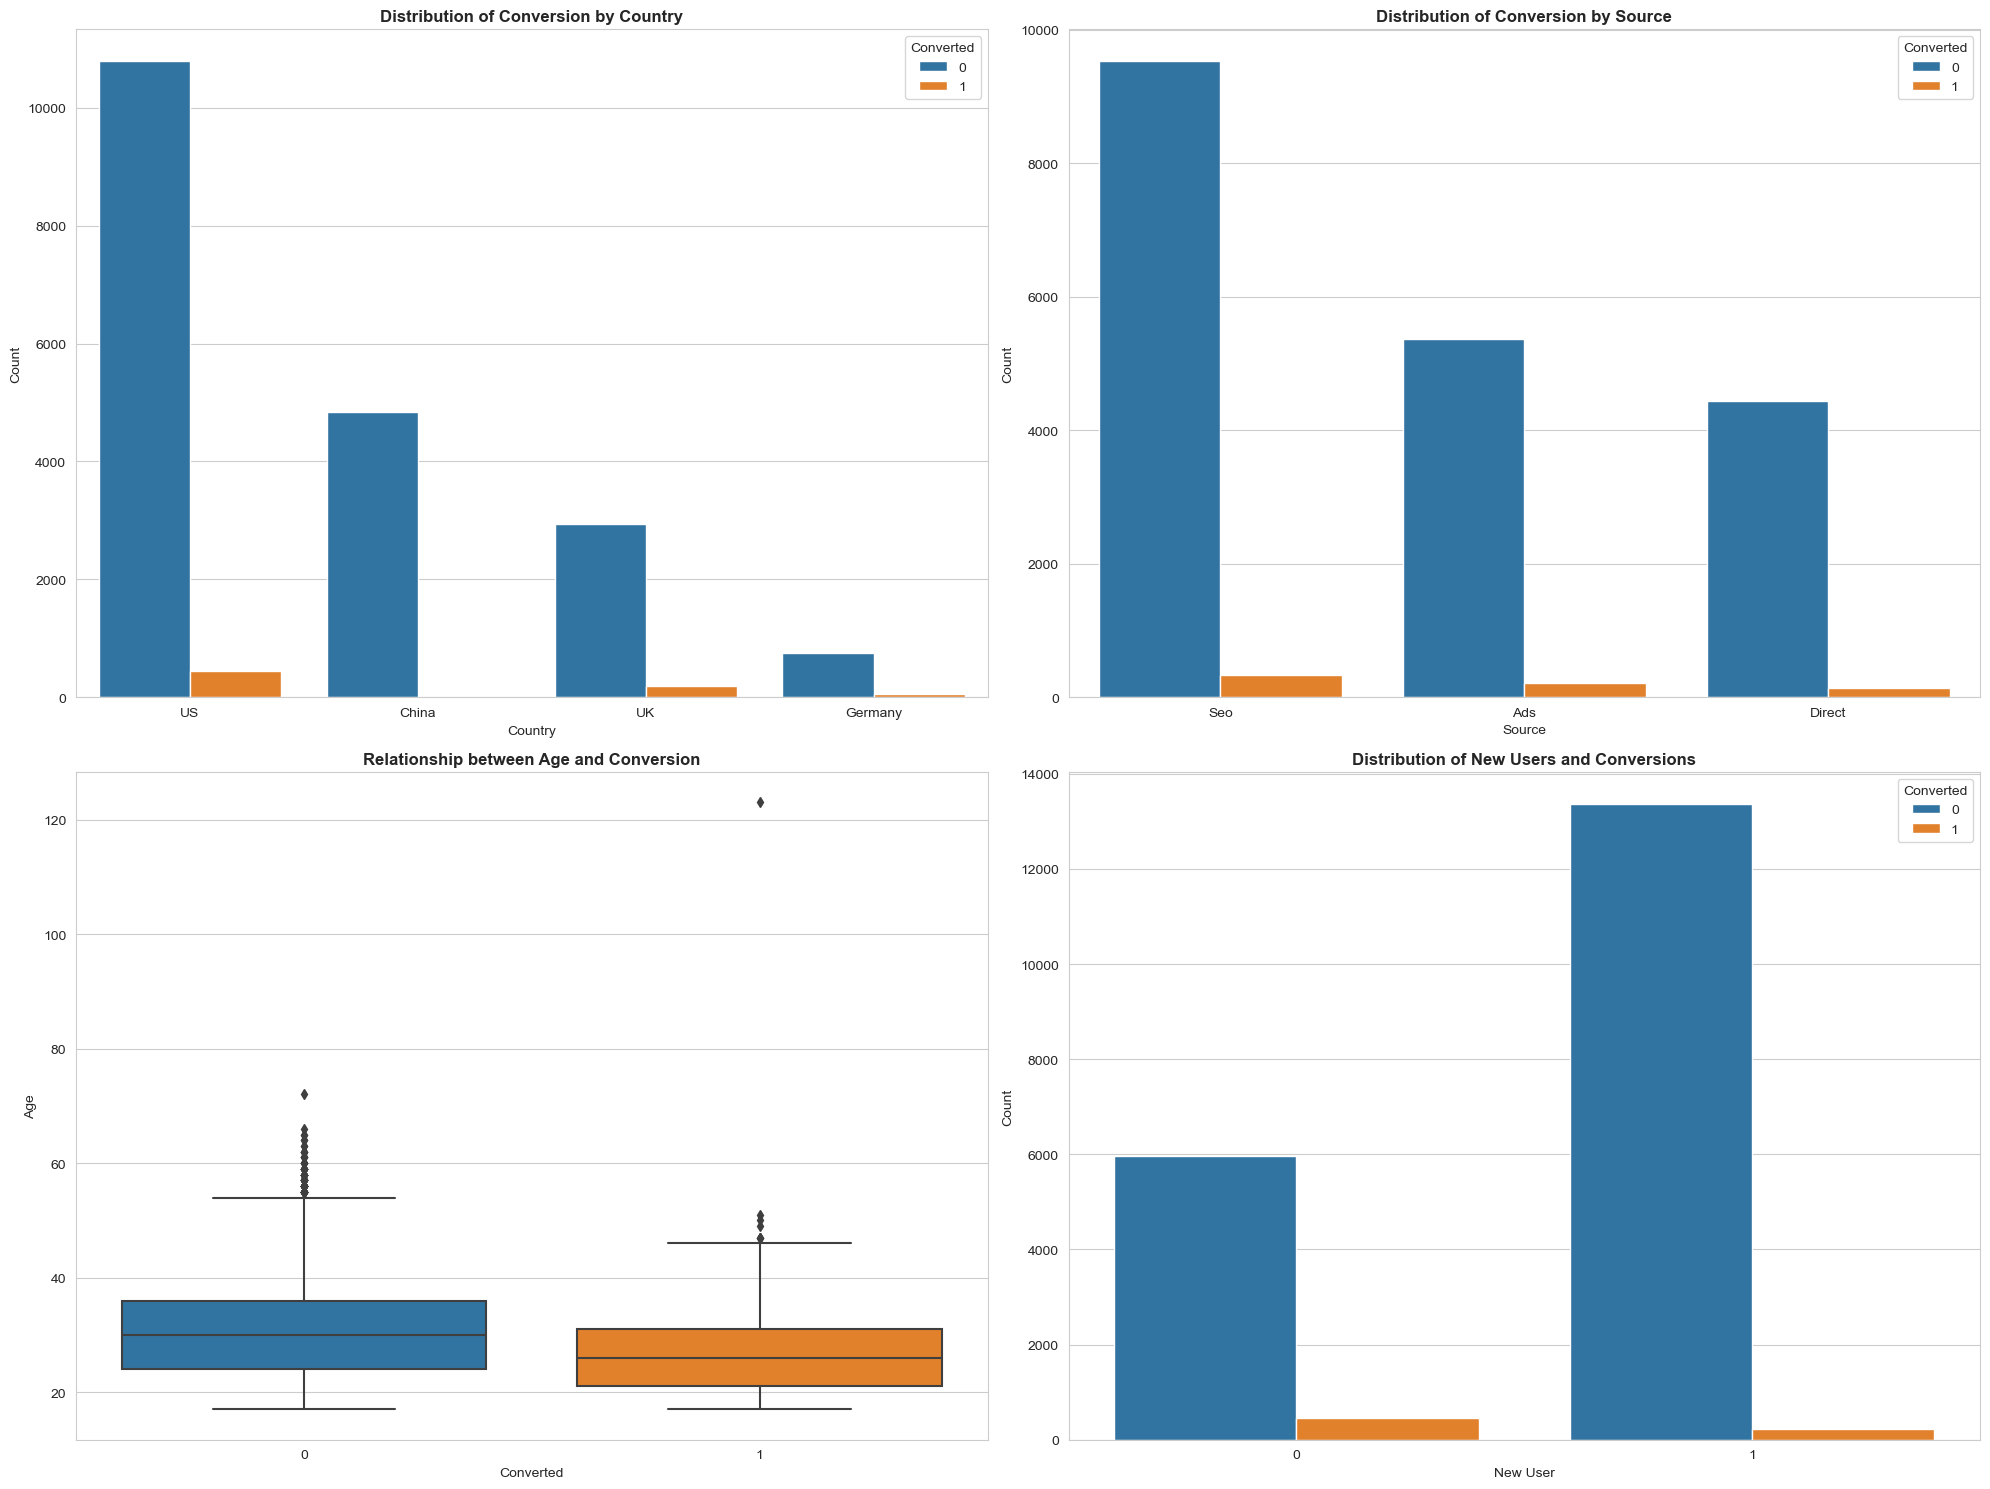

In [7]:
# Create a figure object
plt.figure(figsize=(20, 15))

# Distribution of conversion by country
plt.subplot(2, 2, 1)
sns.countplot(data=data_sample, x='country', hue='converted', order=data_sample['country'].value_counts().index)
plt.title('Distribution of Conversion by Country', weight='bold')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Converted')

# Distribution of conversion by source
plt.subplot(2, 2, 2)
sns.countplot(data=data_sample, x='source', hue='converted', order=data_sample['source'].value_counts().index)
plt.title('Distribution of Conversion by Source', weight='bold')
plt.xlabel('Source')
plt.ylabel('Count')
plt.legend(title='Converted')

# Relationship between age and conversion
plt.subplot(2, 2, 3)
sns.boxplot(data=data_sample, x='converted', y='age')
plt.title('Relationship between Age and Conversion', weight='bold')
plt.xlabel('Converted')
plt.ylabel('Age')

# Distribution of new users and conversions
plt.subplot(2, 2, 4)
sns.countplot(data=data_sample, x='new_user', hue='converted')
plt.title('Distribution of New Users and Conversions', weight='bold')
plt.xlabel('New User')
plt.ylabel('Count')
plt.legend(title='Converted')

# Adjust layout
plt.tight_layout()
plt.show()


<center> <font color="bleu"> <ins>Observations</font>
</center>
</br>


 - 1. <ins>Distribution of conversion by country</ins>: Users from the US have the highest conversion rate, followed by the UK and Germany.</br>
  China, despite a large number of users, has a very low conversion rate.

- 2. <ins>Distribution of conversion by source</ins> : All three sources (Seo, Ads, Direct) show similar conversion rates, although "Seo" seems to have a slight advantage.

- 3. <ins>Relationship between Age and Conversion</ins>: Users who convert tend to be slightly younger than those who don't convert.

- 4. <ins>Distribution of new users and conversions</ins> :Existing users (new_user = 0) have a significantly higher conversion rate than new users.

<u><h4>3. Data preprocessing

In [8]:
# Handling outliers in the "age" feature

print('Dropping outliers in Age...')
print("...")
threshold_age = 90
data_sample = data_sample[data_sample['age'] <= threshold_age]

print('Done.')

print('Done. Number of lines remaining : ', data_sample.shape[0])
print()

# Verify the changes
data_sample['age'].describe()


Dropping outliers in Age...
...
Done.
Done. Number of lines remaining :  19999



count    19999.000000
mean        30.533977
std          8.247541
min         17.000000
25%         24.000000
50%         30.000000
75%         36.000000
max         72.000000
Name: age, dtype: float64

In [9]:
# Separate target variable Y from features X
print("Separating labels from features...")
print("...")
features_list = ["country", "age", "new_user", "source", "total_pages_visited"]
target_variable = "converted"

Y = data_sample.loc[: , target_variable]
X = data_sample.loc[:,features_list] 

print("...Done.")
print()

print(" Y : ")
print(Y.head())
print()
print(" X : ")
print(X.head())
print()


Separating labels from features...
...
...Done.

 Y : 
149371    0
221325    0
14016     0
257982    0
59983     0
Name: converted, dtype: int64

 X : 
        country  age  new_user source  total_pages_visited
149371       US   20         1    Ads                    7
221325       US   31         1    Seo                    5
14016        US   28         0    Seo                    4
257982  Germany   25         1    Ads                    4
59983        US   44         0    Ads                    7



In [10]:
# Automatically detect names of numeric/categorical columns
numeric_features =[]
categorical_features = []
for i,t in X.dtypes.items():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['age', 'new_user', 'total_pages_visited']
Found categorical features  ['country', 'source']


In [11]:
# Divide dataset into Train set and Test set
print("Dividing into Train and Test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.1, random_state= 0, stratify= Y)
print("...Done.")
print()

Dividing into Train and Test sets...
...Done.



<u>3.1 Preprocessing

In [12]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop= "first"))
])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor= ColumnTransformer(
    transformers=[
       ("num" , numeric_transformer, numeric_features),
       ("cat" ,  categorical_transformer, categorical_features)
])

In [13]:
# Preprocessings on Train set
print("Performing preprocessings on train set")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done.")
print(X_train[0:5]) 
print()

# Preprocessing on Test set
print("Performing preprocessings on test set")
print(X_test.head())
X_test = preprocessor.transform(X_test)
print("...Done.")
print(X_test[0:5, :])# numpy array
print()

Performing preprocessings on train set
       country  age  new_user source  total_pages_visited
11657       US   41         1    Ads                    3
184684      UK   30         1    Seo                    5
42774       US   35         1    Seo                    3
75256       US   25         0    Ads                    1
163323   China   22         0    Ads                    6
...Done.
[[ 1.27077167  0.69066838 -0.56068666  0.          0.          1.
   0.          0.        ]
 [-0.06475648  0.69066838  0.03212911  0.          1.          0.
   0.          1.        ]
 [ 0.54230177  0.69066838 -0.56068666  0.          0.          1.
   0.          1.        ]
 [-0.67181473 -1.44787285 -1.15350243  0.          0.          1.
   0.          0.        ]
 [-1.03604968 -1.44787285  0.32853699  0.          0.          0.
   0.          0.        ]]

Performing preprocessings on test set
       country  age  new_user  source  total_pages_visited
20136       US   33         1  Direct   

<u><h4> 4. Train a baseline model

<u> <center><font color="pink"> A. First model

<U>A.1 Logistic Regression

In [14]:
# Create a model instance and train it
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [15]:
print('Train accuracy : {}\nTest accuracy : {}'.format(classifier.score(X_train, Y_train), classifier.score(X_test, Y_test)))

Train accuracy : 0.9847213734096338
Test accuracy : 0.989


<u>A.2 Performance assessment


<li>A.2.1.<ins> Predictions

In [16]:
# Predictons on training set
print( "Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print( "Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



<li>A.2.2.<ins> Probabilities

In [17]:
# It's also possible to get the probabilities estimated by the model:
#Train set
print("Probabilities on training set...")
Y_train_proba = classifier.predict_proba(X_train)
print("...Done.")
print(Y_train_proba[:5])
print()

#Test set
print("Probabilities on training set...")
Y_test_proba = classifier.predict_proba(X_test)
print("...Done.")
print(Y_test_proba[:5])
print()


Probabilities on training set...
...Done.
[[9.99923926e-01 7.60736084e-05]
 [9.99014150e-01 9.85849861e-04]
 [9.99904567e-01 9.54326428e-05]
 [9.99755347e-01 2.44652524e-04]
 [9.98293611e-01 1.70638902e-03]]

Probabilities on training set...
...Done.
[[9.94362637e-01 5.63736338e-03]
 [9.99887220e-01 1.12779981e-04]
 [9.99657003e-01 3.42996611e-04]
 [9.99571424e-01 4.28575949e-04]
 [9.79898202e-01 2.01017975e-02]]



<li>A.2.3.<ins> F1_Score

In [18]:
# Print F1 scores
print("f1 score Logistic Regression on training set : " , f1_score(Y_train, Y_train_pred))
print("f1 score Logistic Regression on test set : ", f1_score(Y_test, Y_test_pred))     

f1 score Logistic Regression on training set :  0.7506799637352674
f1 score Logistic Regression on test set :  0.8307692307692308


<center> <font color="bleu"> <ins>Observations</font>
</center>
</br>
F1 score is particularly useful in case of imbalanced data, as it appears to be the case in our dataset.
The F1 scores obtained are relatively good, knowing that 1 is the best possible score; This indicates that our model is able to correctly predict whether a user will subscribe to the newsletter or not.</br>
The baseline model reaches a f1-score of 83%.
The model is not overfitting and that it performs well on the new data.

<li>A.2.4.<ins> Confusion Matrices

<Figure size 1000x800 with 0 Axes>

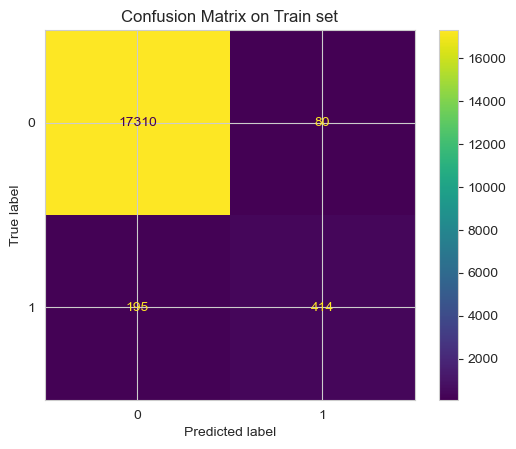

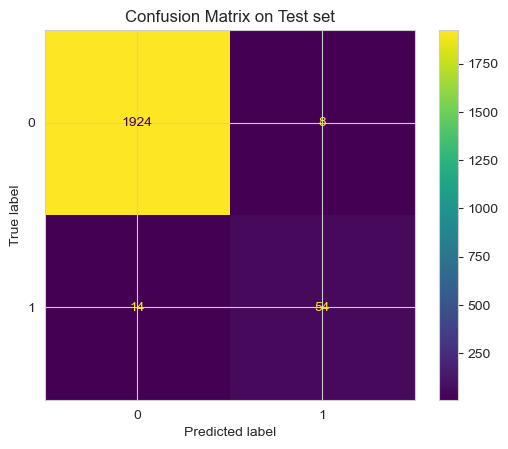

Confusion matrix on train set : 
[[17310    80]
 [  195   414]]

Confusion matrix on test set : 
[[1924    8]
 [  14   54]]



In [19]:
# Visualize confusion matrices

plt.figure(figsize=(10, 8))
_ , ax = plt.subplots() 
title = ax.set(title="Confusion Matrix on Train set") 
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) 
plt.show()

_ , ax = plt.subplots() 
title = ax.set(title="Confusion Matrix on Test set") 
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) 
plt.show()

print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

In [20]:
# We'll not calculate the accuracy cause our dataset is imbalanced (more precisely the target variable),consequently the accuracy could be misleading.
df['converted'].value_counts()

converted
0    275400
1      9180
Name: count, dtype: int64

<u> <center><font color="pink"> B. Second model 

<U>B.1. Random Forest 

In [21]:
# Create a model instance and train it
print("Train model...")
Random_Forest_model = RandomForestClassifier()
Random_Forest_model.fit(X_train, Y_train)
print("...Done.")

Train model...


...Done.


<u>B.2 Performance assessment


<li>B.2.1.<ins> Predictions

In [22]:
# Predictions on training and test sets
Y_train_pred = Random_Forest_model.predict(X_train)
Y_test_pred = Random_Forest_model.predict(X_test)
print("Predictions on training set: \n",Y_train_pred, "\n\nPredictions on test set: \n", Y_test_pred)

Predictions on training set: 
 [0 0 0 ... 0 0 0] 

Predictions on test set: 
 [0 0 0 ... 0 0 0]


<li>B.2.2.<ins> Probabilities

In [23]:
#Train and test sets
Y_train_proba = Random_Forest_model.predict_proba(X_train)
Y_test_proba = Random_Forest_model.predict_proba(X_test)
print("Train Probabilities:\n", Y_train_proba[:5], "\n\nTest Probabilities:\n", Y_test_proba[:5])

Train Probabilities:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 

Test Probabilities:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


<li>B.2.3.<ins> F1_Score

In [24]:
# Print F1 scores
print("f1 score Random Forest on training set : " , f1_score(Y_train, Y_train_pred))
print("f1 score Random Forest on test set : ", f1_score(Y_test, Y_test_pred))   

f1 score Random Forest on training set :  0.9064124783362218
f1 score Random Forest on test set :  0.7559055118110236


<center> <font color="bleu"> <ins>Observations</font>
</center>
</br>
The F1 score is significantly higher on the training set than on the testing set. it is overfitting.
The random forest model may be too complex or too well suited to the training data, to the detriment of its ability to generalize over unseen data.
The F1 score reaches 75%.

<li>B.2.4.<ins> Confusion Matrices


<Figure size 1000x800 with 0 Axes>

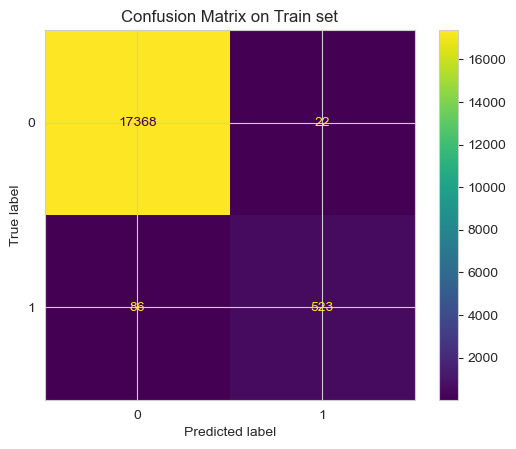

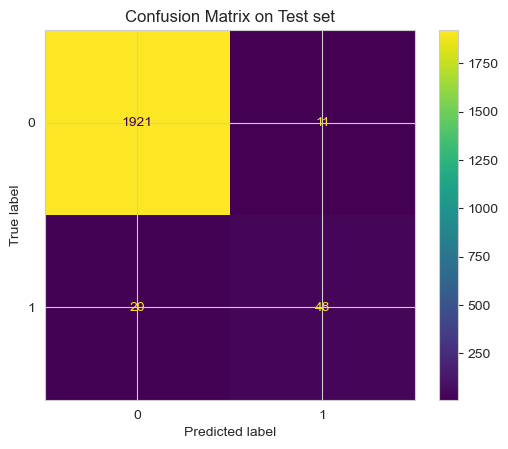

Confusion matrix on train set : 
[[17368    22]
 [   86   523]]

Confusion matrix on test set : 
[[1921   11]
 [  20   48]]



In [25]:
# Visualize confusion matrices

plt.figure(figsize=(10, 8))
_ , ax = plt.subplots() 
title = ax.set(title="Confusion Matrix on Train set") 
ConfusionMatrixDisplay.from_estimator(Random_Forest_model, X_train, Y_train, ax=ax) 
plt.show()

_ , ax = plt.subplots()
title = ax.set(title="Confusion Matrix on Test set") 
ConfusionMatrixDisplay.from_estimator(Random_Forest_model, X_test, Y_test, ax=ax) 
plt.show()

print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

<u> <center><font color="pink"> C. Third model 

<U>C.1. SVM: Support Vector Machine

In [26]:
# Create a model instance and train it
print("Train model...")
svc = SVC( probability = True)
svc.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


<u>C.2 Performance assessment


<li>C.2.1.<ins> Predictions

In [27]:
# Predictons on training and test set
Y_train_pred = svc.predict(X_train)
Y_test_pred = svc.predict(X_test)
print("Predictions on training set:\n",  Y_train_pred, "\n\nPredictions on test set:\n",  Y_test_pred)

Predictions on training set:
 [0 0 0 ... 0 0 0] 

Predictions on test set:
 [0 0 0 ... 0 0 0]


<li>C.2.2.<ins> Probabilities

In [28]:
#Train and test sets
Y_train_proba = svc.predict_proba(X_train)
Y_test_proba = svc.predict_proba(X_test)
print("Train Probabilities:\n", Y_train_proba[:5], "\n\nTest Probabilities:\n", Y_test_proba[:5])

Train Probabilities:
 [[0.99106594 0.00893406]
 [0.98831664 0.01168336]
 [0.99467791 0.00532209]
 [0.98453884 0.01546116]
 [0.99600125 0.00399875]] 

Test Probabilities:
 [[0.98765406 0.01234594]
 [0.99336075 0.00663925]
 [0.99065488 0.00934512]
 [0.98806906 0.01193094]
 [0.98602514 0.01397486]]


<li>C.2.3.<ins> F1_Score

In [29]:
# Print F1 scores
print("f1 score svc on training set : " , f1_score(Y_train, Y_train_pred))
print("f1 score svc on test set : ", f1_score(Y_test, Y_test_pred))     

f1 score svc on training set :  0.7382550335570469
f1 score svc on test set :  0.773109243697479


<li>C.2.4.<ins> Confusion Matrices

<Figure size 1000x800 with 0 Axes>

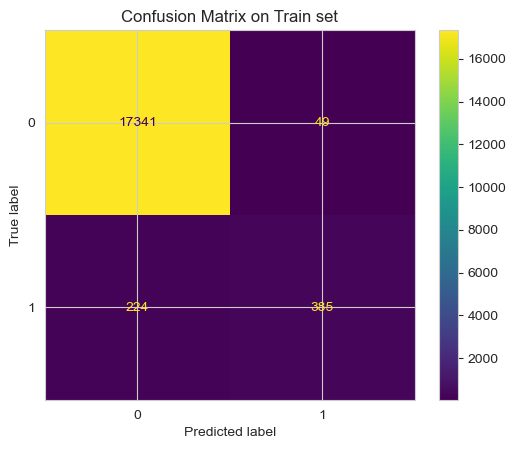

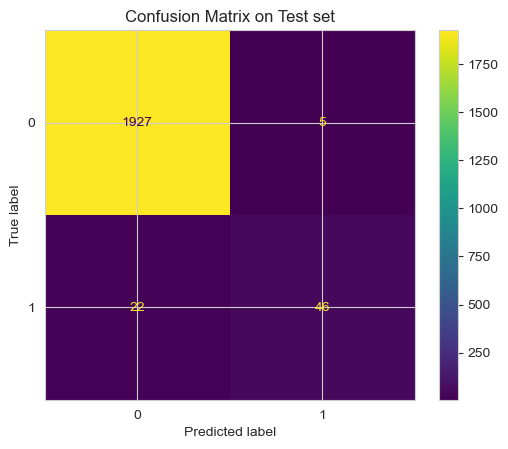

Confusion matrix on train set : 
[[17341    49]
 [  224   385]]

Confusion matrix on test set : 
[[1927    5]
 [  22   46]]



In [30]:
# Visualize confusion matrices

plt.figure(figsize=(10, 8))
_ , ax = plt.subplots() # Get subplot from matplotlib
title = ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc , X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
title = ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc , X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

<center> <font color="bleu"> <ins>Observations</font>
</center>
</br>
The score is better than the one obtained with the Random Forest model, we reach a f1 score of 77%.
</br>
</br>
</br>

# <u>Part 2: Model Improvement


<li> <u> A.Hyperparameters optimization by Grid search

<U>1)Logistic Regression

In [31]:
print("Grid search...")
logistic = LogisticRegression()

params= {
    'C' : [ 0.1, 1, 5,10, 100]
}
gridsearch = GridSearchCV (logistic, param_grid = params, scoring= "f1", cv = 5, verbose=1) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")

#Let's exctract the best model (best estimator) and the corresponding performance (best_score)
best_model_logistic = gridsearch.best_estimator_
best_f1_score = gridsearch.best_score_

Y_pred = best_model_logistic.predict(X_test)
test_f1_score_log = f1_score(Y_test, Y_pred)

print("Best hyperparameters : ", gridsearch.best_params_)
print("Best F1-score: ", best_f1_score)
print("F1-score on the test set: ",test_f1_score_log)

Grid search...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
...Done.
Best hyperparameters :  {'C': 100}
Best F1-score:  0.7528806592980597
F1-score on the test set:  0.8396946564885497


<u>2) Random Forest

In [32]:
# Perform grid search
print("Grid search...")
Random_Forest_model = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200]
}
gridsearch = GridSearchCV(Random_Forest_model, param_grid = params, verbose= 1, cv = 5) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")

best_model_Random_Forest_model= gridsearch.best_estimator_
best_f1_score= gridsearch.best_score_

Y_pred = best_model_Random_Forest_model.predict(X_test)
test_f1_score_Random_Forest_model = f1_score(Y_test, Y_pred)

print("Best hyperparameters : ", gridsearch.best_params_)
print("Best F1-score: ", best_f1_score)
print("F1-score on the test set: ", test_f1_score_Random_Forest_model)

Grid search...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
...Done.
Best hyperparameters :  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best F1-score:  0.9838879627056899
F1-score on the test set:  0.7652173913043478


<u>3) SVC

In [33]:
# Perform grid search
print("Grid search...")
svc = SVC()

# Grid of values to be tested
params = {
    'C': [0.1, 1, 10],
    'gamma': ["scale", "auto"],
    'kernel': ['linear', 'rbf']
}
gridsearch = GridSearchCV(svc, param_grid = params, cv = 5,scoring="f1", verbose = 1) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")

best_model_svc= gridsearch.best_estimator_
best_f1_score= gridsearch.best_score_

Y_pred = best_model_svc.predict(X_test)
test_f1_score_svc = f1_score(Y_test, Y_pred)

print("Best hyperparameters : ", gridsearch.best_params_)
print("Best F1-score: ", best_f1_score)
print("F1-score on the test set: ", test_f1_score_svc)

Grid search...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
...Done.
Best hyperparameters :  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1-score:  0.745824867780059
F1-score on the test set:  0.8031496062992127


<li> <u> B.Improve your model's f1-score on your test set

As the Logistic Regression performs the best, we are going to improve its performances.
Let's find the combination of hyperparameters that gives the best performance.

<u> First method : Bagging

In [34]:
# Perform grid search
print("Grid search...")
logistic_regression = LogisticRegression(max_iter = 1000) 
model = BaggingClassifier(estimator= logistic_regression)

# Grid of values to be tested
params = {
    'base_estimator__C': [0.1, 1, 5, 10, 20], # base_estimator__ prefix because C is a parameter from LogisticRegression! 
    'n_estimators': [5, 10, 20, 30] # n_estimators is a hyperparameter of the ensemble method
}
print(params)
gridsearch = GridSearchCV(model, param_grid = params, cv = 5, verbose = 1, scoring = "f1") # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")

bagging_logistic_regression=gridsearch.best_estimator_
best_f1_score=gridsearch.best_score_

Y_pred = bagging_logistic_regression.predict(X_test)
test_f1_score_baglog = f1_score(Y_test, Y_pred)

print("Best hyperparameters : ", gridsearch.best_params_)
print("Best F1-score: ", best_f1_score)
print("F1-score on the test set: ",test_f1_score_baglog)


Grid search...
{'base_estimator__C': [0.1, 1, 5, 10, 20], 'n_estimators': [5, 10, 20, 30]}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/nadiapreuvot/miniconda3/envs/nadia_machine_learning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/Users/nadiapreuvot/miniconda3/envs/nadia_machine_learning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/Users/nadiapreuvot/miniconda3/envs/nadia_machine_learning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_pa

...Done.
Best hyperparameters :  {'base_estimator__C': 20, 'n_estimators': 5}
Best F1-score:  0.757150067056417
F1-score on the test set:  0.8396946564885497


/Users/nadiapreuvot/miniconda3/envs/nadia_machine_learning/lib/python3.10/site-packages/sklearn/model_selection/_search.py:929: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


<u>  Second method : Boosting

In [35]:
# Perform grid search
print("Grid search...")
logistic_regression = LogisticRegression(max_iter = 1000) # max_iter changed because of convergence warning
model = AdaBoostClassifier (estimator = logistic) 

# Grid of values to be tested
params = {
    'estimator__C': [0.1, 1, 5, 10, 20], # base_estimator__ prefix because C is a parameter from LogisticRegression! 
    'n_estimators': [5, 10, 20, 30] # n_estimators is a hyperparameter of the ensemble method
}
print(params)
gridsearch = GridSearchCV(model, param_grid = params, cv = 5, verbose = 1, scoring="f1") # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")

adaboost_logistic = gridsearch.best_estimator_
best_f1_score = gridsearch.best_score_

Y_pred = adaboost_logistic.predict(X_test)
test_f1_score_boostlog = f1_score(Y_test, Y_pred)

print("Best hyperparameters : ", gridsearch.best_params_)
print("Best F1-score: ", best_f1_score)
print("F1-score on the test set: ",test_f1_score_boostlog)

Grid search...
{'estimator__C': [0.1, 1, 5, 10, 20], 'n_estimators': [5, 10, 20, 30]}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
...Done.
Best hyperparameters :  {'estimator__C': 20, 'n_estimators': 20}
Best F1-score:  0.7553406375316001
F1-score on the test set:  0.8153846153846154


<u> Third method : Voting

In [36]:
# Voting
voting = VotingClassifier(estimators=[("logistic", best_model_logistic),("bagging_logistic_regression", bagging_logistic_regression), ("adaboost_log", adaboost_logistic), ("best_model_svc", best_model_svc)], voting='hard') # soft: use probabilities for voting
voting.fit(X_train, Y_train)

Y_pred = voting.predict(X_test)
test_f1_score_vot = f1_score(Y_test, Y_pred)
print("F1-score on test set:", test_f1_score_vot)

F1-score on test set: 0.8217054263565892


In [37]:
test_f1_scores = [test_f1_score_log, test_f1_score_Random_Forest_model, test_f1_score_svc, 
                  test_f1_score_Random_Forest_model, test_f1_score_boostlog, test_f1_score_baglog, test_f1_score_vot]

best_f1_score = max(test_f1_scores)

print("The best f1-score is: ", best_f1_score)


The best f1-score is:  0.8396946564885497


<center> <font color="bleu"> <ins>Observations</font>
</center>
</br>

The best model is a logistic regression with C = 20. Knowing that C corresponds to the regularization parameter.
The greater the value of 'C', the less the regularization is strong.
Thus, the model is less constrained and can adjust its coefficients more freely to fit the training data

# <u>Part 4: Predictions on Test Data.csv


In [38]:
data_without_labels = pd.read_csv("/Users/nadiapreuvot/Desktop/conversion_rate_project/conversion_data_test.csv")

print('Prediction set without labels :', data_without_labels.shape)
print()
data_without_labels

Prediction set without labels : (31620, 5)



,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3
...,...,...,...,...,...
31615,Germany,25,1,Seo,3
31616,US,36,1,Ads,7
31617,UK,33,1,Seo,5
31618,UK,25,1,Seo,14


In [39]:
print("Encoding categorical features and standardizing numerical features...")

data_without_labels = preprocessor.transform(data_without_labels)
print("...Done")
print(data_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.30757978 -1.44787285  3.29261583  0.          1.          0.
   0.          1.        ]
 [-1.03604968  0.69066838  0.03212911  0.          1.          0.
   1.          0.        ]
 [ 0.17806682  0.69066838 -1.15350243  0.          0.          0.
   0.          1.        ]
 [ 0.17806682  0.69066838  0.32853699  0.          0.          1.
   0.          0.        ]
 [-0.67181473 -1.44787285 -0.56068666  0.          0.          0.
   0.          1.        ]]


In [40]:
#let's create a dictionnary including the predictions
data = {
    'converted': best_model_logistic.predict(data_without_labels)
}

#let's create a new dataframe for the predictions of the model

Y_predictions = pd.DataFrame(columns=['converted'],data=data)

#let's create a csv file
Y_predictions.to_csv('conversion_data_test_predictions.csv')